# LSTM for Time Series Prediction:

## Author: Avinash Bagul
##### MSc Artificial Intelligence
##### University Of Aberdeen

IMPORTING REQUIRED LIBRARIES

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam, RMSprop
from keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


READING DATASET AND EXTRACTING REQUIRED DATA FROM THE DATASET

In [5]:
df1 = pd.read_csv('iqr_benchmark.csv', parse_dates=['Time_stamp'], index_col=['Time_stamp'])
df1 = df1.loc[df1['boxName']=='Bernem']
df = df1.drop(df1.iloc[:,2:], axis =1)
df = df.drop(df.iloc[:,0:1], axis = 1)

THE ORIGIONAL DATA (BENCHMARK)

In [6]:
df1

,boxName,PM 2.5,temp,pressure,humidity,wind_speed,Time of Day,Peak/NoPeak,Day,Week Day,Weather,Weather Description,label
Time_stamp,,,,,,,,,,,,,
2018-12-31 18:30:53,Bernem,139.63,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,abnormal
2018-12-31 18:35:01,Bernem,136.43,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,abnormal
2018-12-31 18:39:09,Bernem,112.67,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,abnormal
2018-12-31 18:43:17,Bernem,46.87,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,abnormal
2018-12-31 18:47:24,Bernem,38.30,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-28 18:11:12,Bernem,3.93,6.00,1013,56,3.60,Evening_Hours,Peak,Friday,Workday,Clear,sky is clear,normal
2020-02-28 18:14:31,Bernem,4.33,6.00,1013,56,3.60,Evening_Hours,Peak,Friday,Workday,Clear,sky is clear,normal
2020-02-28 18:21:01,Bernem,3.93,6.00,1013,56,3.60,Evening_Hours,Peak,Friday,Workday,Clear,sky is clear,normal


UNIVARIATE PM 2.5 DATA

In [7]:
frame = df
frame = frame.sort_index()
frame

,PM 2.5
Time_stamp,
2018-12-31 18:30:53,139.63
2018-12-31 18:35:01,136.43
2018-12-31 18:39:09,112.67
2018-12-31 18:43:17,46.87
2018-12-31 18:47:24,38.30
...,...
2020-02-28 18:11:12,3.93
2020-02-28 18:14:31,4.33
2020-02-28 18:21:01,3.93


REMOVING NULL VALUES

In [8]:
frame = frame.dropna()
frame.shape

(162173, 1)

SCALING THE PM 2.5 FEATURES

In [9]:
train = frame
scaler = MinMaxScaler()
scaler.fit(train)
train = scaler.transform(train)

DEFINING LSTM MODEL

In [10]:
import time
n_input = 24
n_features = 1

start = time.time()

adam = Adam(lr=0.001)

generator = TimeseriesGenerator(train, train, length=n_input, batch_size=24)

model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(n_input, n_features)))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(optimizer =adam, loss='mse')

model.fit_generator(generator, epochs=15)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
6757/6757 [==============================] - 74s 11ms/step - loss: 1.2758e-04
Epoch 2/15
6757/6757 [==============================] - 79s 12ms/step - loss: 3.8306e-04
Epoch 3/15
6757/6757 [==============================] - 78s 11ms/step - loss: 1.2396e-04
Epoch 4/15
6757/6757 [==============================] - 79s 12ms/step - loss: 1.9503e-04
Epoch 5/15
6757/6757 [==============================] - 79s 12ms/step - loss: 9.2054e-05
Epoch 6/15
6757/6757 [==============================] - 78s 12ms/step - loss: 1.0349e-04
Epoch 7/15
6757/6757 [==============================] - 77s 11ms/step - loss: 8.0037e-05
Epoch 8/15
6757/6757 [==============================] - 77s 11ms/step - loss: 7.8636e-05
Epoch 9/15
6757/6757 [==============================] - 77s 11ms/step - loss: 7.4598e-05
Epoch 10/15
6757/6757 [==============================] - 77s 11ms/step - loss: 7.0324e-05
Epoch 11/15
6757/6757 [==========

In [11]:
import time
pred_list = []
start = time.time()
length = len(train)/n_input
length = int(length+1)
print(length)
xin = n_input
for x in range(length):

  print(len(train[xin:xin+24]))
  if len(train[xin:xin+24]) == 24:
    batch = train[xin:xin+24].reshape((1, n_input, n_features))
    print(batch)
    for i in range(n_input):
      pred_list.append(model.predict(batch)[0])
      batch = np.append(batch[:,1:,:], [[pred_list[i]]], axis=1)

  xin = xin+24

print("--- %s seconds ---" % (time.time() - start))

Streaming output truncated to the last 5000 lines.
  [0.00330454]
  [0.00310174]
  [0.00330454]
  [0.0051298 ]
  [0.00592909]
  [0.00863714]
  [0.00342384]
  [0.00390103]
  [0.00235016]
  [0.00334033]
  [0.00366244]
  [0.00310174]
  [0.00354314]
  [0.00279156]
  [0.00270805]
  [0.00294665]
  [0.00294665]
  [0.00441401]
  [0.00330454]
  [0.00291086]
  [0.00386524]]]
24
[[[0.00381752]
  [0.00345963]
  [0.00322103]
  [0.00481962]
  [0.01030731]
  [0.00473611]
  [0.00322103]
  [0.00330454]
  [0.00286314]
  [0.00279156]
  [0.00250525]
  [0.00306595]
  [0.00303016]
  [0.00326875]
  [0.00345963]
  [0.00366244]
  [0.00318525]
  [0.00334033]
  [0.00303016]
  [0.00274384]
  [0.00330454]
  [0.01908761]
  [0.01233537]
  [0.00493892]]]
24
[[[0.00306595]
  [0.00334033]
  [0.00354314]
  [0.00258876]
  [0.00326875]
  [0.00294665]
  [0.00402033]
  [0.00318525]
  [0.00381752]
  [0.00267227]
  [0.00369822]
  [0.00291086]
  [0.00303016]
  [0.00374594]
  [0.00334033]
  [0.00366244]
  [0.00330454]
  [0.0033

CREATING NEW DATA-FRAME WITH ACTUAL AND PREDICTED VALUES

In [12]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list), index=frame[24:162168].index, columns=['predictions'])

df_test = pd.concat([frame, df_predict], axis=1)

In [13]:
df_test.head(50)

,PM 2.5,predictions
Time_stamp,,
2018-12-31 18:30:53,139.63,NaN
2018-12-31 18:35:01,136.43,NaN
2018-12-31 18:39:09,112.67,NaN
2018-12-31 18:43:17,46.87,NaN
2018-12-31 18:47:24,38.30,NaN
2018-12-31 18:51:32,56.53,NaN
2018-12-31 18:55:52,37.60,NaN
2018-12-31 19:00:11,36.43,NaN
2018-12-31 19:04:37,34.90,NaN


PLOTTING ACTUAL PM 2.5 VALUES WITH BLUE AND PREDICTED 2.5 VALUES WITH RED

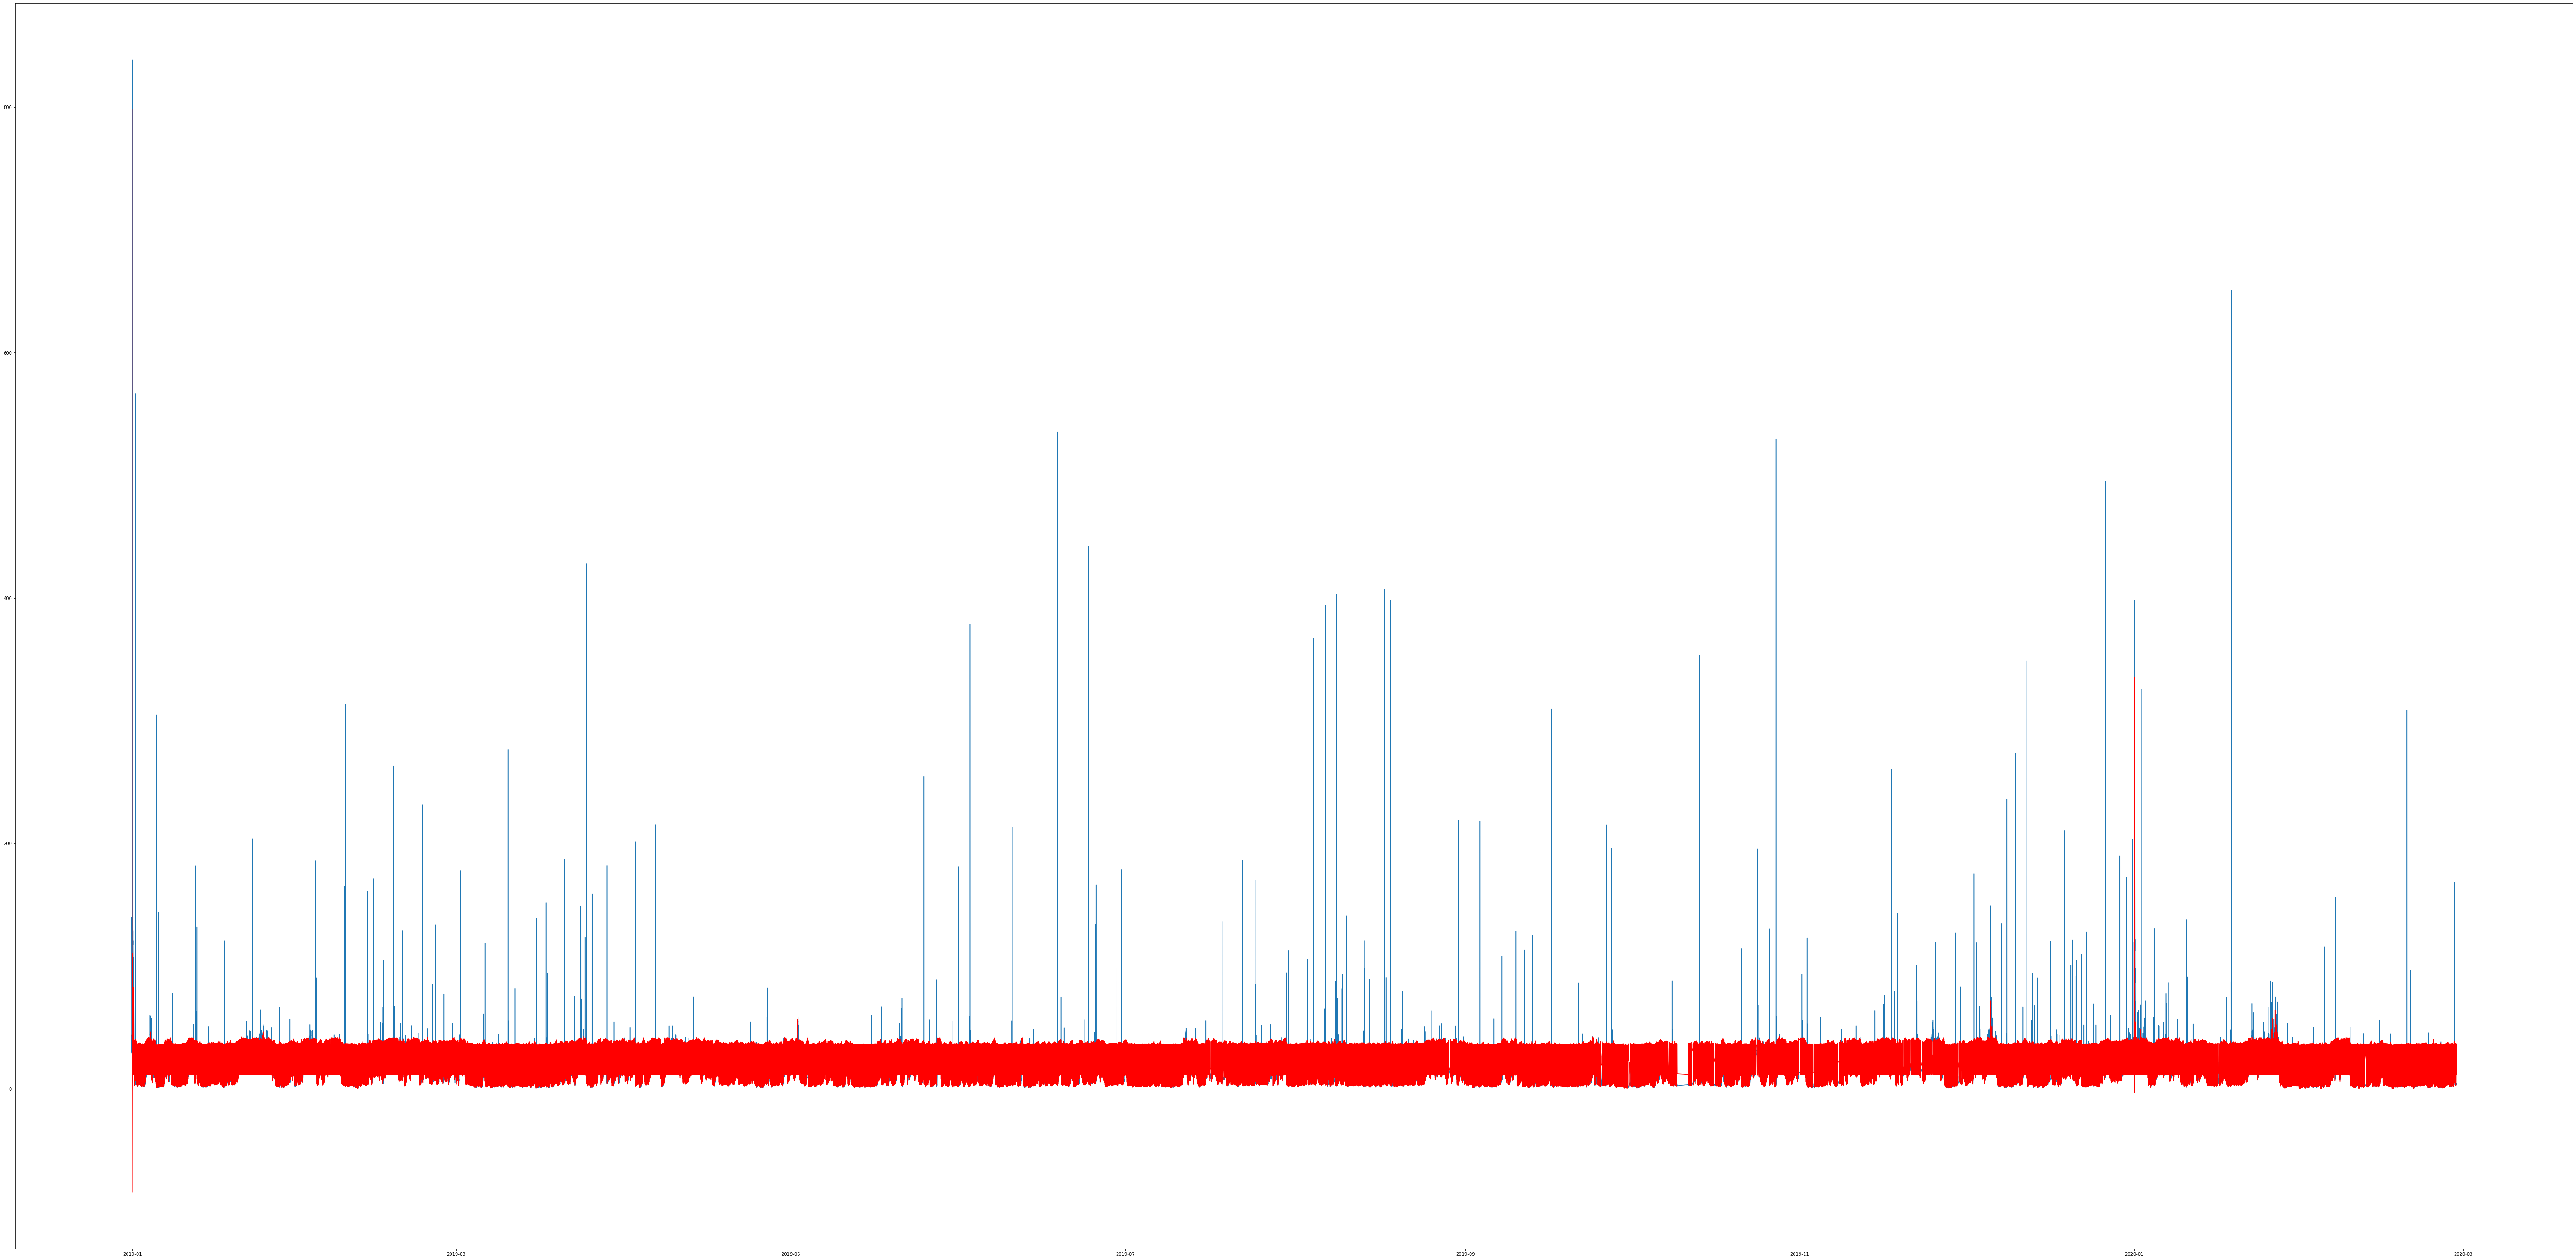

In [14]:
plt.figure(figsize=(100,50))
plt.plot(df_test.index, df_test['PM 2.5'])
plt.plot(df_test.index, df_test['predictions'], color = 'r')
plt.savefig('actual_vs_predicted_HourWise_pred.png', bbox_inches='tight')
plt.show()


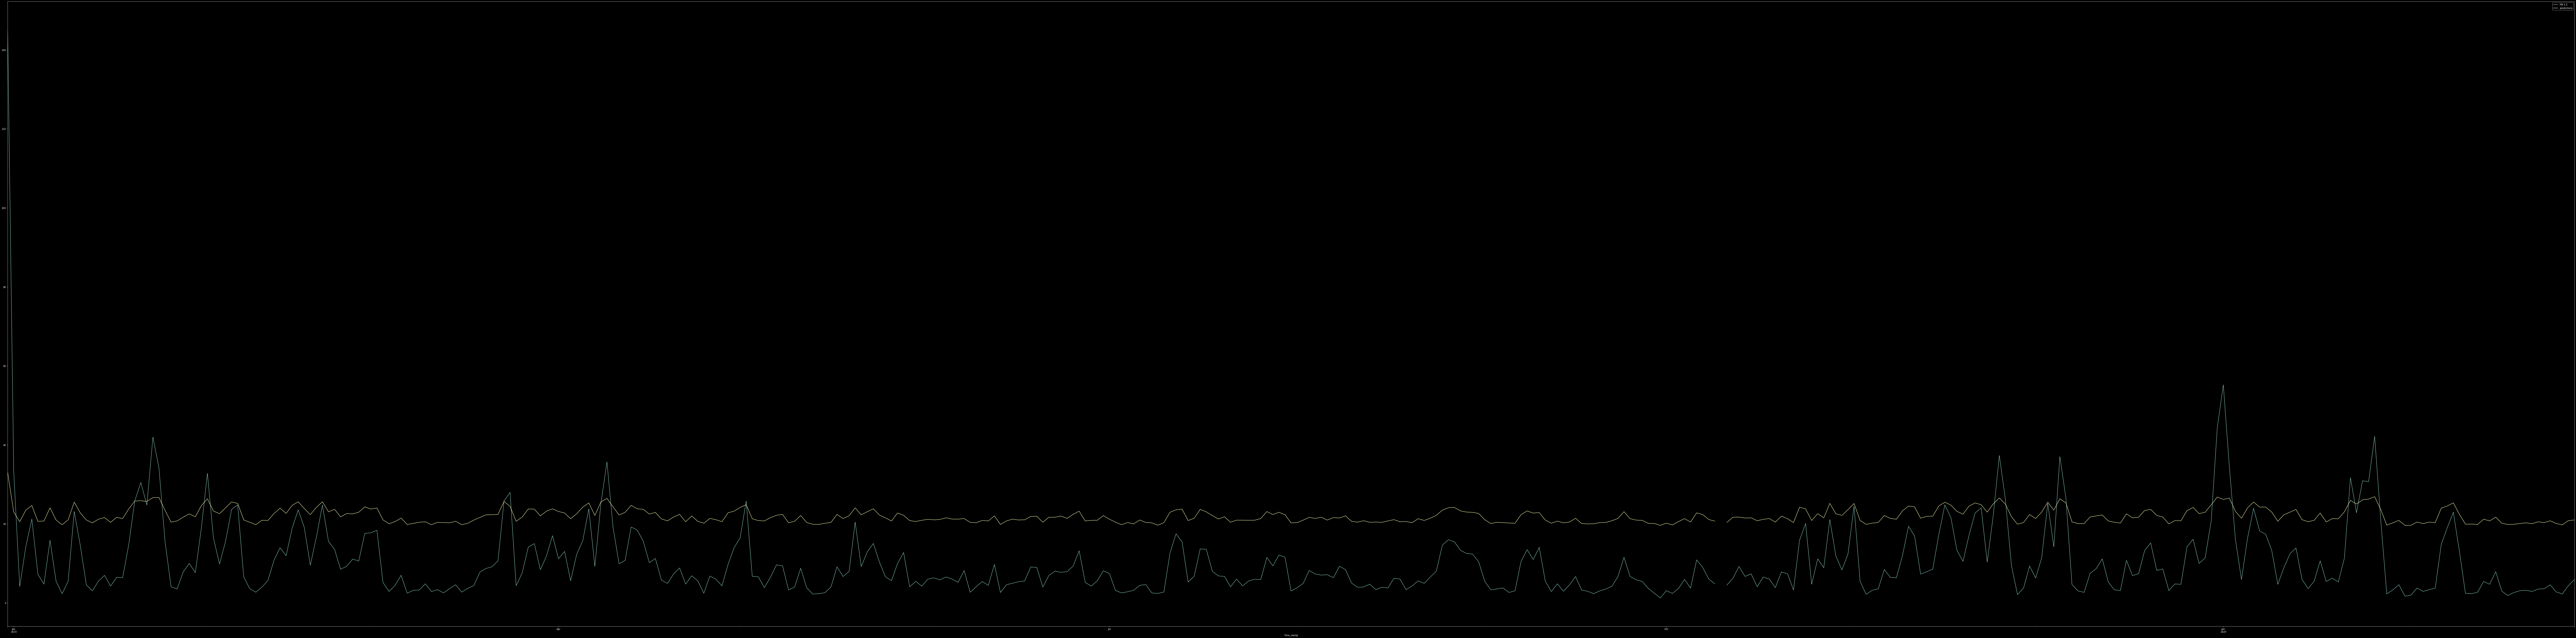

In [15]:
pred = df_test

#plt.figure(figsize=(800,200))
plt.style.use('dark_background')
pred.resample('D').mean().plot(figsize=(200,50))
plt.savefig('actual_vs_predicted_2.png', bbox_inches='tight')
#plt.figure(figsize=(100,50))

#plt.plot(pred.index, df_test['PM 2.5'])
#plt.plot(pred.index, df_test['predictions'], color = 'r')
#plt.show()

CALCULATING ROOT MEAN SQUARED ERROR

In [20]:
from math import sqrt

actual = df_test['PM 2.5'].iloc[24:162168]
pred = df_test['predictions'].iloc[24:162168]
val = df_test.values
anomaly = []
ll = []
for i in range(24,162168):
    temp = []
    #print(i)
    x = val[i][0]
    y = val[i][1]

    z = x-y

    temp.append(df_test.index[i])
    temp.append(val[i][0])
    temp.append(val[i][1])

    if z > 5:
        temp.append(x)
        ll.append('abnormal')
    else:
        ll.append('normal')

anomaly.append(temp)

error = mean_squared_error(actual, pred)
print('Test MSE: %.3f' % error)
rmse = sqrt(mean_squared_error(actual, pred))
print('Test RMSE: %f'% rmse)

Test MSE: 402.074
Test RMSE: 20.051781


### EVALUATION METRICS

CALCULATING ACCURACY, PRECISION, RECALL AND F1 SCORE

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

obt_label = ll
ff = df1.iloc[24:162168]
gold_label = ff['label']
testy = obt_label
yhat_classes = gold_label


# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(testy, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(testy, yhat_classes, pos_label = 'abnormal')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(testy, yhat_classes, pos_label = 'abnormal')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(testy, yhat_classes, pos_label = 'abnormal')
print('F1 score: %f' % f1)
cm = confusion_matrix(testy, yhat_classes)
print('Confusion matrix: \n', cm)

Accuracy: 0.923839
Precision: 0.454742
Recall: 0.345681
F1 score: 0.392782
Confusion matrix: 
 [[  3994   7560]
 [  4789 145801]]
